In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/realifake/Realifake/FAKE/fake_12723.jpg
/kaggle/input/realifake/Realifake/FAKE/fake_24129.jpg
/kaggle/input/realifake/Realifake/FAKE/fake_21071.jpg
/kaggle/input/realifake/Realifake/FAKE/fake_78324.jpg
/kaggle/input/realifake/Realifake/FAKE/fake_13601.jpg
/kaggle/input/realifake/Realifake/FAKE/fake_43500.jpg
/kaggle/input/realifake/Realifake/FAKE/fake_21765.jpg
/kaggle/input/realifake/Realifake/FAKE/fake_26452.jpg
/kaggle/input/realifake/Realifake/FAKE/fake_1068.jpg
/kaggle/input/realifake/Realifake/FAKE/fake_16385.jpg
/kaggle/input/realifake/Realifake/FAKE/fake_81914.jpg
/kaggle/input/realifake/Realifake/FAKE/fake_82015.jpg
/kaggle/input/realifake/Realifake/FAKE/fake_57398.jpg
/kaggle/input/realifake/Realifake/FAKE/fake_29730.jpg
/kaggle/input/realifake/Realifake/FAKE/fake_24540.jpg
/kaggle/input/realifake/Realifake/FAKE/fake_25404.jpg
/kaggle/input/realifake/Realifake/FAKE/fake_45641.jpg
/kaggle/input/realifake/Realifake/FAKE/fake_3016.jpg
/kaggle/input/realifake/Realif

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import layers, models

In [14]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
batch_size = 256
img_height = 224
img_width = 224

In [16]:
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [17]:
for layer in base_model.layers:
    layer.trainable = False

In [18]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [19]:
optimizer = Adam
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [21]:
dataset_path='/kaggle/input/realifake/Realifake'

In [22]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.4,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 174425 files belonging to 2 classes.
Using 104655 files for training.


In [23]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.4,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 174425 files belonging to 2 classes.
Using 69770 files for validation.


In [24]:
test_ds = val_ds.take(int(len(val_ds) * 0.5))
val_ds = val_ds.skip(int(len(val_ds) * 0.5))

In [25]:
epochs = 10

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10


I0000 00:00:1718121223.023626      87 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1718121223.147700      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


408/409 ━━━━━━━━━━━━━━━━━━━━ 0s 801ms/step - accuracy: 0.6321 - loss: 5.3814

W0000 00:00:1718121657.181925      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


409/409 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6322 - loss: 5.3721   

W0000 00:00:1718121759.903936      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1718121935.770706      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


409/409 ━━━━━━━━━━━━━━━━━━━━ 859s 2s/step - accuracy: 0.6323 - loss: 5.3629 - val_accuracy: 0.7480 - val_loss: 0.5096
Epoch 2/10
409/409 ━━━━━━━━━━━━━━━━━━━━ 468s 1s/step - accuracy: 0.7237 - loss: 0.5350 - val_accuracy: 0.7689 - val_loss: 0.4894
Epoch 3/10
409/409 ━━━━━━━━━━━━━━━━━━━━ 468s 1s/step - accuracy: 0.7429 - loss: 0.4995 - val_accuracy: 0.7761 - val_loss: 0.4565
Epoch 4/10
409/409 ━━━━━━━━━━━━━━━━━━━━ 469s 1s/step - accuracy: 0.7580 - loss: 0.4775 - val_accuracy: 0.7826 - val_loss: 0.4402
Epoch 5/10
409/409 ━━━━━━━━━━━━━━━━━━━━ 470s 1s/step - accuracy: 0.7662 - loss: 0.4653 - val_accuracy: 0.7880 - val_loss: 0.4376
Epoch 6/10
409/409 ━━━━━━━━━━━━━━━━━━━━ 464s 1s/step - accuracy: 0.7737 - loss: 0.4493 - val_accuracy: 0.7795 - val_loss: 0.4436
Epoch 7/10
409/409 ━━━━━━━━━━━━━━━━━━━━ 465s 1s/step - accuracy: 0.7774 - loss: 0.4474 - val_accuracy: 0.7873 - val_loss: 0.4260
Epoch 8/10
409/409 ━━━━━━━━━━━━━━━━━━━━ 465s 1s/step - accuracy: 0.7825 - loss: 0.4346 - val_accuracy: 0.796

In [26]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_ds, verbose=2)
print(f'Test accuracy: {test_acc}')

136/136 - 108s - 795ms/step - accuracy: 0.8037 - loss: 0.4088
Test accuracy: 0.8036534786224365


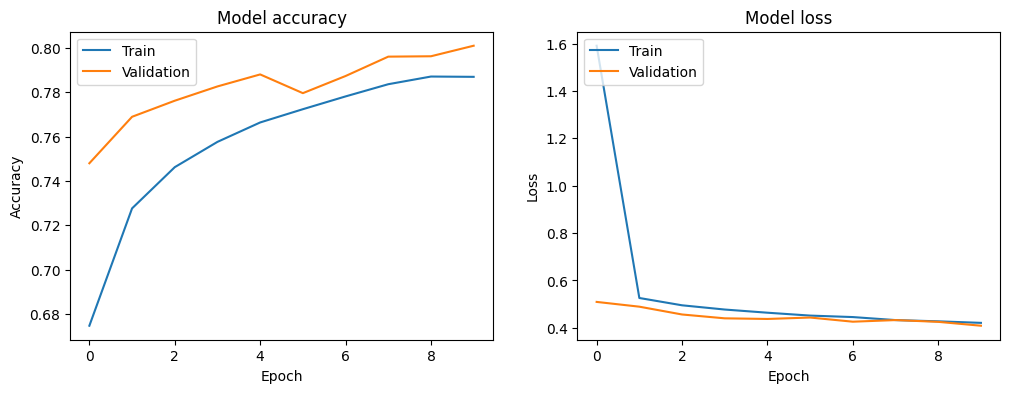

In [27]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [ ]:
from tensorflow.keras.models import load_model
h5_model_path = 'my_model.h5'  # Replace with your desired file path
model.save(h5_model_path)

print(f"Model saved to {h5_model_path}")
loaded_model = tf.keras.models.load_model(h5_model_path)
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
tflite_model = converter.convert()
open("model.tflite", "wb").write(tflite_model)

Model saved to my_model.h5
